# Studi Kasus EDA
Dataset yang digunakan adalah netflix dataset.


The resource of dataset is from [kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)


In [11]:
#Download this module to help visualization
#pip install plotly 

In [49]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors

In [13]:
data = pd.read_csv("../Dataset/netflix_titles.csv")
B, K = data.shape
print('Baris = ', B, 'dan', 'Kolom = ', K)

Baris =  8807 dan Kolom =  12


In [14]:
#melihat 5 data pertama 
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
#mengubah tipe data untuk variabel yang ingin diubah tipe datanya
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')
data['date_added'] = data['date_added'].astype('datetime64')

In [17]:
data["month_added"] = data["date_added"].dt.month
data["month"] = data["date_added"].dt.month_name()
data["year"] = data["date_added"].dt.year

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8797 non-null   float64       
 13  month         8797 non-null   object        
 14  year          8797 non-null   float64       
dtypes: category(2), datetime64[ns](1), flo

In [19]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


In [20]:
# Mengganti nilai \n (kosong) pada variabel country dengan nilai NaN
data[['country']] = data[['country']].replace('\n', np.nan)

In [21]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
month_added       10
month             10
year              10
dtype: int64

In [22]:
#Menghapus semua baris yang memiliki missing values

#Karena tidak memungkinkan melakukan proses imputasi
data.dropna(inplace=True)

In [23]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
month           0
year            0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month,year
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Statistika Sederhana 

In [26]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month,year
count,5332,5332,5332,5332,5332,5332,5332,5332.000000,5332,5332,5332,5332,5332.000000,5332,5332.000000
unique,5332,2,5332,3945,5200,604,1450,NaN,14,198,335,5321,NaN,12,NaN
top,s8,Movie,Sankofa,"Raúl Campos, Jan Suter",Samuel West,United States,2020-01-01 00:00:00,NaN,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...,NaN,October,NaN
freq,1,5185,1,18,10,1846,92,NaN,1822,135,336,2,NaN,491,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.742123,NaN,NaN,NaN,NaN,6.620968,NaN,2018.825956
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.625831,NaN,NaN,NaN,NaN,3.495769,NaN,1.540456
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,1.000000,NaN,2008.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,4.000000,NaN,2018.000000


Berdasarkan perhitungan statistik sederhana diseluruh variabel. Diperolah dari data sejumlah 5332 terdapat 2 tipe video yang disediakan oleh netflix, 5332 judul gabungan dari judul film maupun judul TV show, dan 604 yang memproduksinya.

## Top 5 Country Produce TV Show or Movie

Text(0.5, 1.0, 'Top 5 Country Produce TV Show or Movie')

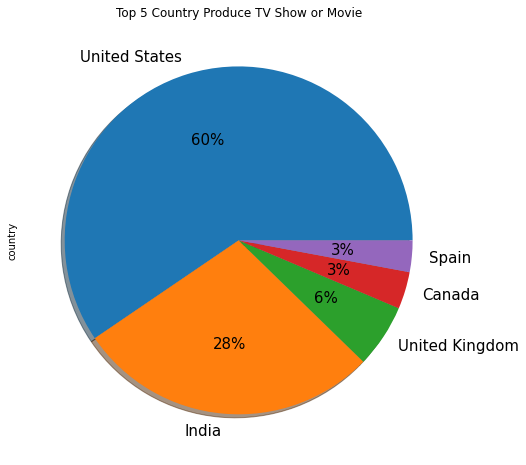

In [28]:
country = data.groupby(data['country'])['country'] \
                       .count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
country.plot.pie(autopct = "%1.f%%",
                shadow = True, 
                fontsize = 15)
plt.title("Top 5 Country Produce TV Show or Movie")

Dilihat dari diagram **Top 5 Country Produce TV Show or Movie**, diperoleh oleh negara **United State** unggul sebesar **60%**, diikuti dengan negara **india** sebesar **28%**, **UK** sebesar **6%**, **canada** dan **spain** sebesar **3%** 

## TV Show and Movie Genre

In [29]:
x = data.groupby(['type'])['type'].count()
y = len(data)

r = ((x/y).round(2))

rasio = pd.DataFrame(r).T

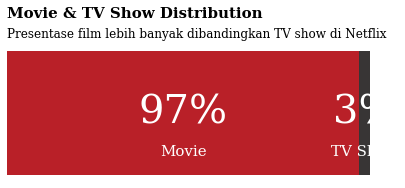

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

ax.barh(rasio.index, rasio['Movie'],
        color = '#b20710', alpha=0.9,
        label='Male')

ax.barh(rasio.index, rasio['TV Show'],
        left=rasio['Movie'], color='#221f1f',
        alpha=0.9, label='Female')

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])

for i in rasio.index:
    ax.annotate(f"{int(rasio['Movie'][i]*100)}%",
                xy=(rasio['Movie'][i]/2, i),
                va='center', ha='center', fontsize=40, 
                    fontweight='light', fontfamily='serif',
                    color='white')

    ax.annotate("Movie",
                xy=(rasio['Movie'][i]/2, -0.25),
                va='center', ha='center', fontsize=15, 
                    fontweight='light', fontfamily='serif',
                    color='white')

for i in rasio.index:
    ax.annotate(f"{int(rasio['TV Show'][i]*100)}%", 
                   xy=(rasio['Movie'][i]+rasio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, 
                   fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(rasio['Movie'][i]+rasio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, 
                   fontweight='light', fontfamily='serif',
                   color='white') 
                    
fig.text(0.125, 1.03, 'Movie & TV Show Distribution',
        fontfamily='serif', fontsize=15, fontweight='bold')

fig.text(0.125, 0.92, "Presentase film lebih banyak dibandingkan TV show di Netflix",
        fontfamily='serif', fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.legend().set_visible(False)
plt.show()

In [45]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(data, title):
    data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in data['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = data['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), 
                       columns=mlb.classes_, 
                       index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',
            fontweight='bold',fontsize=15)
    fig.text(.78,.580,
            '''
             Sangat menarik bahwa Independent Movies
             memiliki hubungan yang positif dengan Drama,
             yang mana keduanya akan naik secara signifikan 
             bersama dengan melihat salah satu peningkatan 
             jumlah penoton saja. 
             
             Sebaliknya, dapat dilihat bahwa International
             Movie memiliki hubungan yang negatif dengan Children
             & Family Movie yang mana akan ada penurunan jumlah
             penonton jika salah satunya mengalami kenaikan.
             ''', fontfamily='serif',fontsize=10,ha='right')

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, 
                    vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


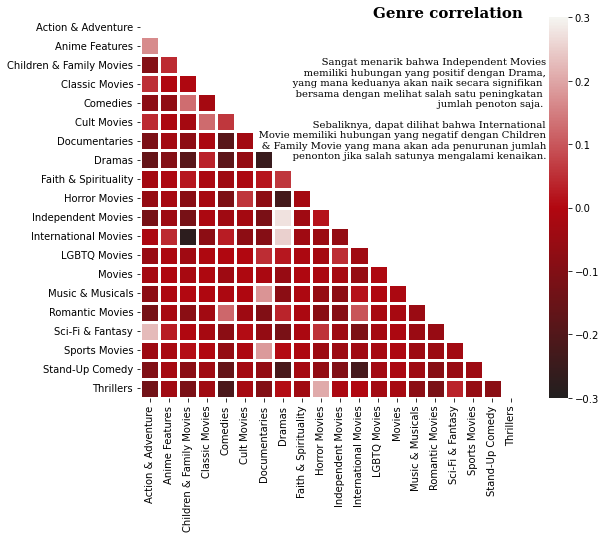

In [47]:
movies = data[data["type"] == "Movie"]

genre_heatmap(movies, 'Movie')
plt.show()

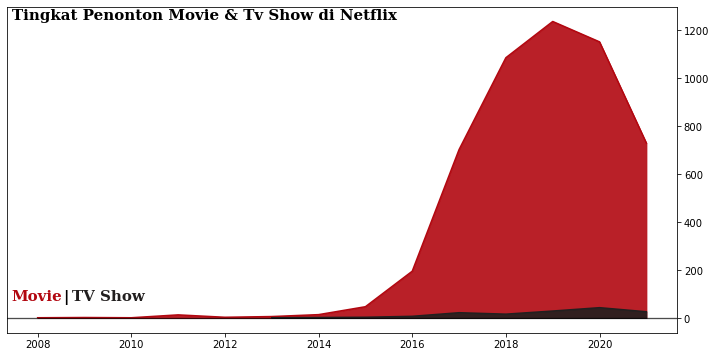

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.text(0.13, 0.85, 'Tingkat Penonton Movie & Tv Show di Netflix', 
        fontsize=15, fontweight='bold', fontfamily='serif')
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(data["type"].value_counts().index):
    mtv_rel = data[data['type']==mtv]['year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', 
        fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif',
         fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', 
        fontsize=15, color='#221f1f')
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.show()

Seperti grafik diatas dapat kita ketahui bahwa sejak tahun 2015 terjadi peningkatan jumlah penonton di Netflix dan peningkatan yang sangat pesat terjadi pada tahun 2016. Yang mana genre **movie** sangat digemari dibandingkan **TV Show**. Tidak hanya itu peningkatan juga terjadi akibat pandemik COVID-19 di seluruh dunia yaitu sejak tahun 2019 yang terjadi pembatasan mobilitas masyarakat sehingga pilihan untuk menonton film maupun TV show dapat dilakukan melalui platform netflix

## Rating

In [62]:
# Helper column for various plots
data['count'] = 1

In [63]:
rating = pd.DataFrame(data.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(rating['rating'])

In [64]:
rating_order

['TV-MA',
 'TV-14',
 'R',
 'PG-13',
 'TV-PG',
 'PG',
 'TV-G',
 'TV-Y7',
 'TV-Y',
 'NR',
 'G',
 'TV-Y7-FV',
 'UR',
 'NC-17',
 '74 min',
 '84 min',
 '66 min']

In [89]:
df1 = data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = df1.loc["Movie"]
tv = -df1.loc['TV Show']

In [84]:
tv

TV-MA       81
TV-14       37
R            0
PG-13        0
TV-PG       15
PG           0
TV-G         3
TV-Y7        6
TV-Y         5
NR           0
G            0
TV-Y7-FV     0
UR           0
NC-17        0
74 min       0
84 min       0
66 min       0
Name: TV Show, dtype: int32

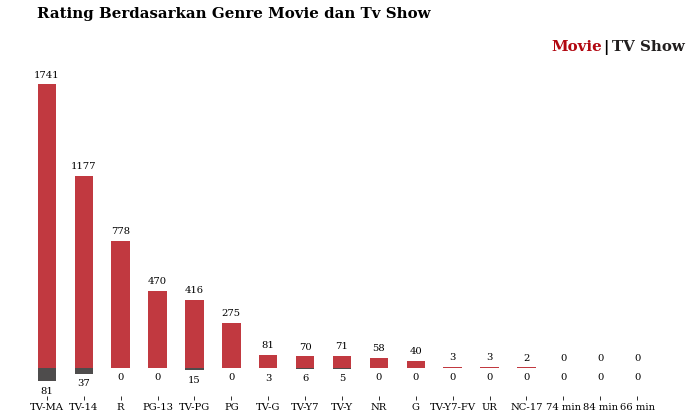

In [95]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, alpha=0.8, label='Movie', color='#b20710')
ax.bar(tv.index, tv, width=0.5, alpha=0.8, label='TV Show', color='#221f1f')

for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(df1.columns, fontfamily='serif')
ax.set_yticks([])  

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating Berdasarkan Genre Movie dan Tv Show', fontsize=15, 
        fontweight='bold', fontfamily='serif')

fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()